In [1]:
#Oluşturduğum kodun drive versiyonunu atıyorum.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Veriyi okuyalım.
df = pd.read_csv('/content/drive/MyDrive/datathon2023/train.csv')

In [5]:
#Bütün veriyi okuduk ve kafamızda bir şeyler canlandı. Şimdi bütün verinin analizini
#yapan fonksiyonu oluşturup iyice dibe dalalım.

def veriyi_incele(df):
    print("########## Verinin Shape'i ##########")
    print(df.shape)
    print("########## Veride Boş Veri Var Mı ##########")
    print(df.isna().sum())
    print("########## Değişkenlerin Tipi ##########")
    print(df.dtypes)
    print("########## Verideki Sayısal Değişkenlerin Açıklanması ##########")
    print(df.describe().T)
    print("########## Veri Bilgi ###########")
    print(df.info())

In [6]:
veriyi_incele(df)

########## Verinin Shape'i ##########
(5460, 14)
########## Veride Boş Veri Var Mı ##########
index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64
########## Değişkenlerin Tipi ##########
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum      

In [7]:
#Veriyi inceledik. Şimdi Kategorik, Nümerik değişkenler ve en önemlisi kategorik gibi
#görünen nümerik ve nümerik gibi görünen kategorik değişken analizi yapmalıyız.
#Bu kısımda değişkenlerin ingilizcesi daha kısa olduğu için onları kullanacağım.

def degisken_ayir(df, cat_th=10, num_th=20):
    cat = [col for col in df.columns if df[col].dtypes == 'O']
    num_but_cat = [col for col in df.columns if df[col].dtypes != 'O'
                  and df[col].nunique() < cat_th]
    cat_but_num = [col for col in df.columns if df[col].dtypes == 'O'
                  and df[col].nunique() > num_th]
    cat = cat + num_but_cat
    cat = [col for col in cat if col not in cat_but_num]
    num = [col for col in df.columns if df[col].dtypes != 'O']
    num = [col for col in num if col not in num_but_cat]
    return cat, cat_but_num, num

In [8]:
#Oluşturduğum fonksiyona değişkenleri çağırıyorum.

cat, cat_but_num, num = degisken_ayir(df)
print('Kategorik Değişkenler : ')
print(cat)
print('Kategorik Gibi Görünen Nümerik Değişkenler : ')
print(cat_but_num)
print('Nümerik Değişkenler : ')
print(num)

Kategorik Değişkenler : 
['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu', 'Öbek İsmi']
Kategorik Gibi Görünen Nümerik Değişkenler : 
[]
Nümerik Değişkenler : 
['index', 'Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']


In [9]:
#Yukarıda Tespit Ettiğimiz Değişkenleri Tiplerine Ve unique değişken sayılarına
#bakarak ispatlayalım.
for col in cat :
    print(f"Değişken Adı : {col}, Değişken Tipi : {df[col].dtypes}, Değişken Unique Sayısı : {df[col].nunique()}")
for col in cat_but_num :
    print(f"Değişken Adı : {col}, Değişken Tipi : {df[col].dtypes}, Değişken Unique Sayısı : {df[col].nunique()}")
for col in num :
    print(f"Değişken Adı : {col}, Değişken Tipi : {df[col].dtypes}, Değişken Unique Sayısı : {df[col].nunique()}")

Değişken Adı : Cinsiyet, Değişken Tipi : object, Değişken Unique Sayısı : 2
Değişken Adı : Yaş Grubu, Değişken Tipi : object, Değişken Unique Sayısı : 5
Değişken Adı : Medeni Durum, Değişken Tipi : object, Değişken Unique Sayısı : 2
Değişken Adı : Eğitim Düzeyi, Değişken Tipi : object, Değişken Unique Sayısı : 9
Değişken Adı : İstihdam Durumu, Değişken Tipi : object, Değişken Unique Sayısı : 4
Değişken Adı : Yaşadığı Şehir, Değişken Tipi : object, Değişken Unique Sayısı : 4
Değişken Adı : En Çok İlgilendiği Ürün Grubu, Değişken Tipi : object, Değişken Unique Sayısı : 5
Değişken Adı : Eğitime Devam Etme Durumu, Değişken Tipi : object, Değişken Unique Sayısı : 2
Değişken Adı : Öbek İsmi, Değişken Tipi : object, Değişken Unique Sayısı : 8
Değişken Adı : index, Değişken Tipi : int64, Değişken Unique Sayısı : 5460
Değişken Adı : Yıllık Ortalama Gelir, Değişken Tipi : float64, Değişken Unique Sayısı : 5460
Değişken Adı : Yıllık Ortalama Satın Alım Miktarı, Değişken Tipi : float64, Değişken U

In [10]:
#Değişkenleri tespit ettik ve veri seti hakkında az çok bilgi sahibiyiz. Şimdi nümerik
#değişkenlerde aykırı değerleri tespit edip onları uç değerlerle dolduralım.
#Önce her bir nümerik değişkendeki uç değerleri tespit etmekle başlayalım.
#iqr yöntemini kullanalım.
def iqr(df, col, q1 = 0.05, q3 = 0.95):
    quantile1 = df[col].quantile(q1)
    quantile3 = df[col].quantile(q3)
    interquantile = quantile3 - quantile1
    down = quantile1 - 1.5 * interquantile
    up = quantile3 + 1.5 * interquantile

    return down, up

In [11]:
for col in num:
    print(iqr(df, col))


(-7096.700000000001, 12555.7)
(-959754.9676347781, 2001268.2199356118)
(-52507.717097700064, 97515.38180692813)
(-67.63170899841963, 123.41946143573449)
(-215.5097101631751, 384.4593465855513)


In [12]:
#Uç değerleri bulduk. Şimdi bu değerleri aşan değerler var mı onu tespit edelim.

def aykiri_iqr(df, col):
    down, up = iqr(df, col)
    if df[(df[col] < down) | (df[col] > up)].any(None):
        return True
    else:
        return False

In [13]:
for col in num:
    print(col, aykiri_iqr(df, col))

index False
Yıllık Ortalama Gelir False
Yıllık Ortalama Satın Alım Miktarı False
Yıllık Ortalama Sipariş Verilen Ürün Adedi False
Yıllık Ortalama Sepete Atılan Ürün Adedi False


<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].a

In [14]:
#index elementinin veride bir işlevi yoktur. İndex i silip aykırı olan nümerik sütun-
#ları baskılayıp devam edeceğiz. Böylece verinin genellenebilirliği artacak.
def aykiriyi_baskila(df,col):
    down, up = iqr(df, col)
    if df.loc[(df[col] > up) | (df[col] < down)].any(None):
        df.loc[(df[col] < down),col] = down
        df.loc[(df[col] > up),col] = up

df = df.drop(columns = 'index', axis = 1)

#index değişkenini sildiğimiz için kategorileri baştan atamamız gerekir.
cat, cat_but_num, num = degisken_ayir(df)

In [15]:
for col in num:
    aykiriyi_baskila(df, col)

<ipython-input-14-e44ab6723ef1>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df.loc[(df[col] > up) | (df[col] < down)].any(None):
<ipython-input-14-e44ab6723ef1>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df.loc[(df[col] > up) | (df[col] < down)].any(None):
<ipython-input-14-e44ab6723ef1>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df.loc[(df[col] > up) | (df[col] < down)].any(None):
<ipython-input-14-e44ab6723ef1>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df.loc[(df[col] > up) | (df[col] < down)].any(None):


In [16]:
#Nümerik değişkenlerin analizi yapıldı. Nümerik oldukları için grafikleri histogram biçiminde oldu.
#Ayrıca dağılımlarını da normalleştirmeye çalıştık ki verinin genellenebilirliği artsın.

def numerik_analiz(df, col, plot=False):
    print(df.groupby('Öbek İsmi').agg({col : 'mean'}))
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]
    print(df[col].describe(quantiles).T)
    min_value = df[col].min()
    if min_value < 0:
        df[col] = np.log(df[col] - min_value + 1)
    else:
        df[col] = np.log(df[col] + 1)
    if plot:
        df[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Cinsiyet                                    5460 non-null   object 
 1   Yaş Grubu                                   5460 non-null   object 
 2   Medeni Durum                                5460 non-null   object 
 3   Eğitim Düzeyi                               5460 non-null   object 
 4   İstihdam Durumu                             5460 non-null   object 
 5   Yıllık Ortalama Gelir                       5460 non-null   float64
 6   Yaşadığı Şehir                              5460 non-null   object 
 7   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 8   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5460 non-null   float64
 10  Eğitime Deva

           Yıllık Ortalama Gelir
Öbek İsmi                       
obek_1             229513.847974
obek_2             172827.509911
obek_3             327899.094458
obek_4             817975.516312
obek_5             222224.036354
obek_6             480117.776102
obek_7             351949.976050
obek_8             255354.926670
count    5.460000e+03
mean     3.635711e+05
std      2.197144e+05
min      4.392299e+04
5%       1.506287e+05
10%      1.705754e+05
20%      2.032899e+05
30%      2.274463e+05
40%      2.517758e+05
50%      2.869254e+05
60%      3.438221e+05
70%      3.727974e+05
80%      4.842462e+05
90%      7.590807e+05
100%     1.192437e+06
max      1.192437e+06
Name: Yıllık Ortalama Gelir, dtype: float64


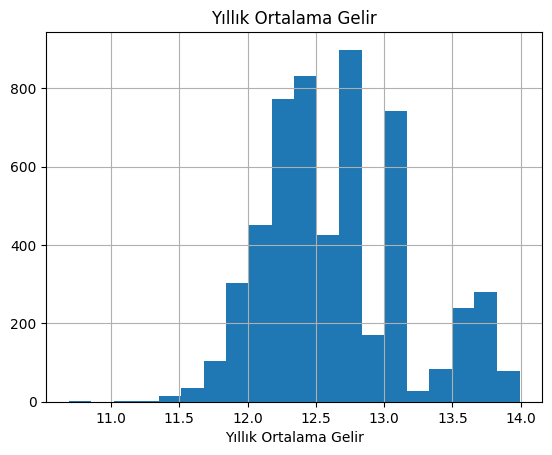

           Yıllık Ortalama Satın Alım Miktarı
Öbek İsmi                                    
obek_1                            6047.195827
obek_2                            4996.038895
obek_3                            7360.697229
obek_4                           32405.008963
obek_5                            4542.305314
obek_6                           39440.273682
obek_7                           26429.293943
obek_8                            9277.243731
count     5460.000000
mean     16616.612217
std      14099.171704
min       2859.254000
5%        3750.944992
10%       3982.074933
20%       4480.098785
30%       5443.628646
40%       6530.204868
50%       8426.818967
60%       9649.438113
70%      27959.771488
80%      33290.270684
90%      38756.728396
100%     48605.594415
max      48605.594415
Name: Yıllık Ortalama Satın Alım Miktarı, dtype: float64


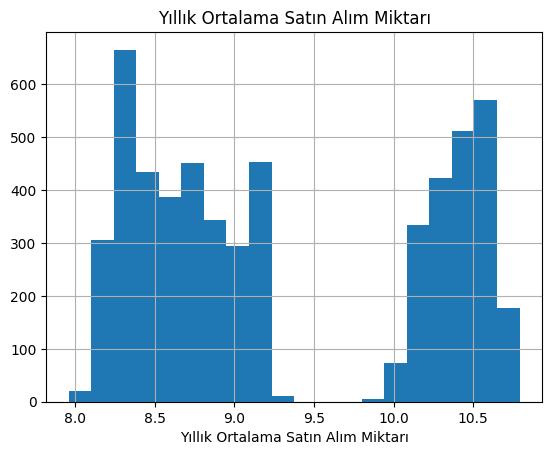

           Yıllık Ortalama Sipariş Verilen Ürün Adedi
Öbek İsmi                                            
obek_1                                       5.865500
obek_2                                      20.665536
obek_3                                      15.209040
obek_4                                      38.890713
obek_5                                      10.697475
obek_6                                      29.776795
obek_7                                      20.279514
obek_8                                      49.087230
count    5460.000000
mean       24.040884
std        14.945655
min         0.000000
5%          4.012480
10%         7.169551
20%        10.321560
30%        14.277608
40%        16.356228
50%        20.095924
60%        26.176960
70%        31.195390
80%        39.760832
90%        46.698859
100%       64.616196
max        64.616196
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: float64


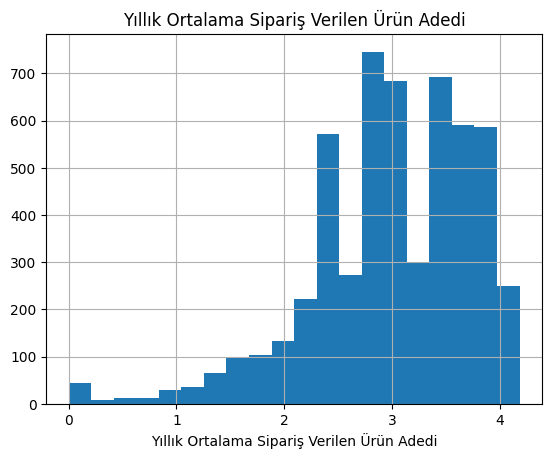

           Yıllık Ortalama Sepete Atılan Ürün Adedi
Öbek İsmi                                          
obek_1                                    13.259577
obek_2                                    50.989216
obek_3                                    21.571290
obek_4                                    98.028592
obek_5                                    99.563686
obek_6                                    50.677581
obek_7                                    98.180834
obek_8                                   146.416046
count    5460.000000
mean       73.445693
std        47.214184
min         3.977559
5%          9.478686
10%        11.471611
20%        20.334653
30%        43.406962
40%        51.719672
50%        82.485579
60%        94.814793
70%       101.236289
80%       108.553175
90%       129.625888
100%      242.308441
max       242.308441
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: float64


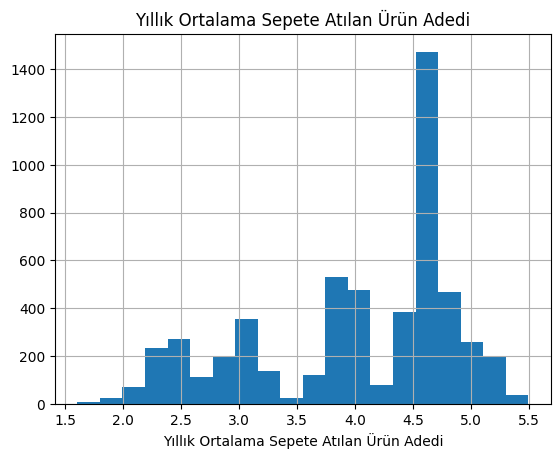

In [18]:
for col in num:
    numerik_analiz(df, col, plot=True)

In [19]:
def kategorik_analiz(df, col, plot=False):
    if plot:
        sns.countplot(x=df[col], data=df)
        plt.show()

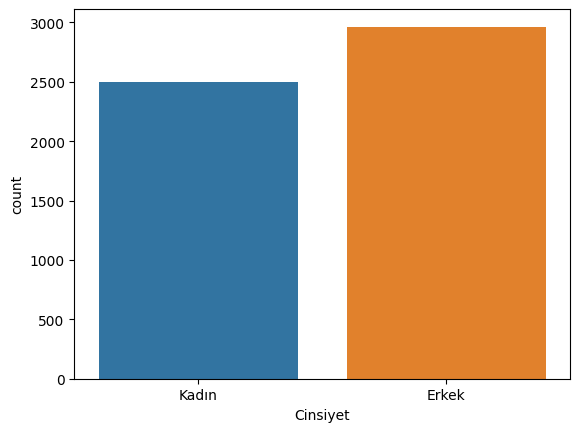

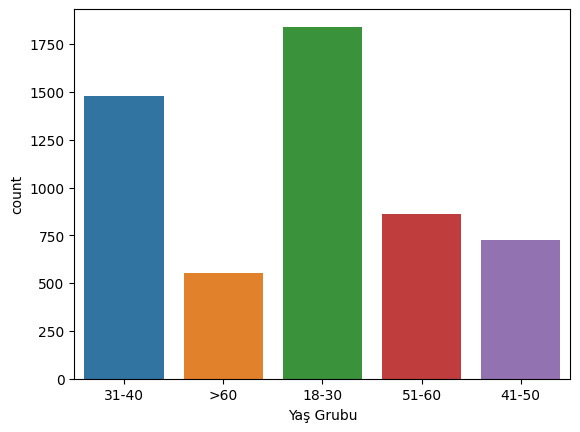

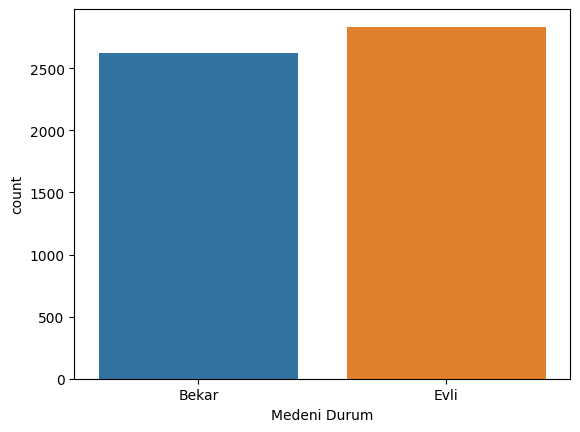

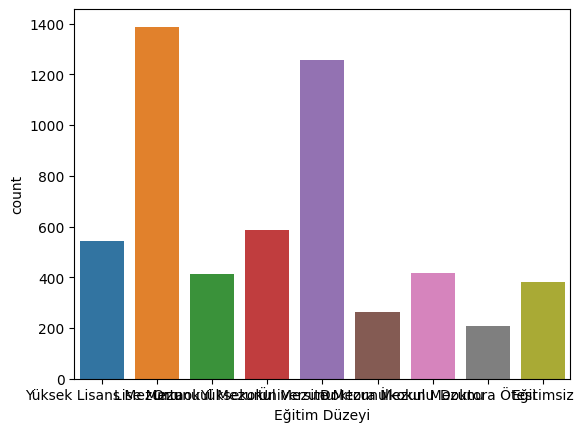

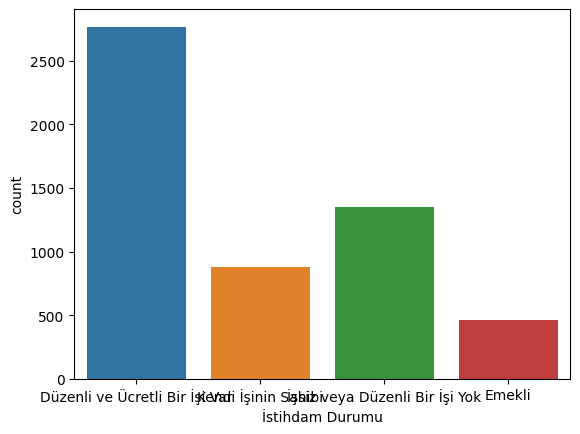

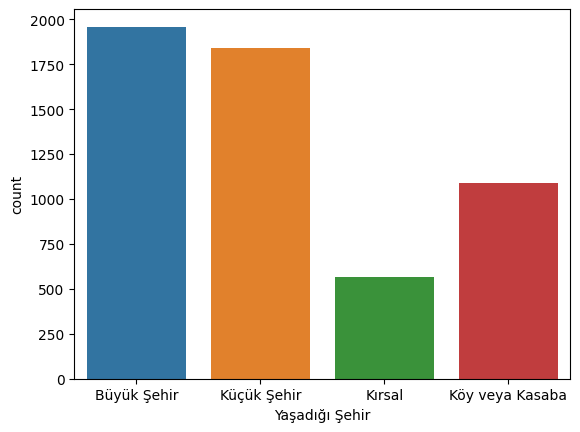

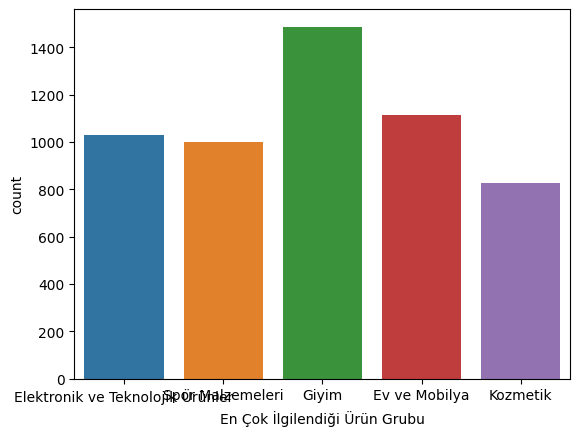

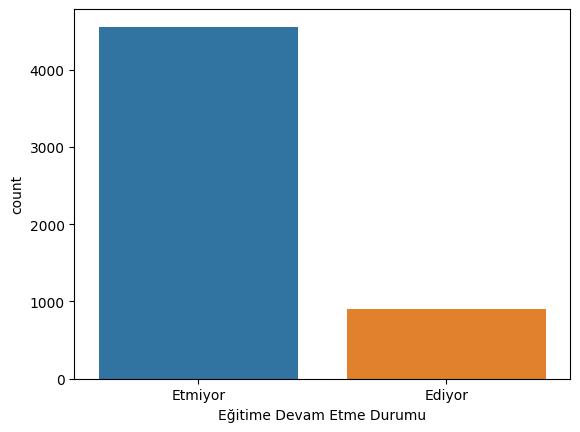

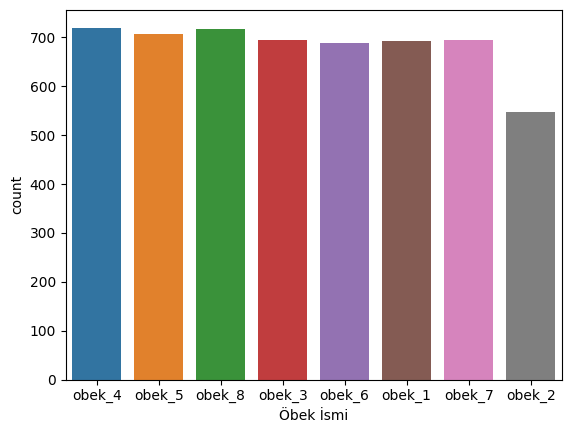

In [20]:
for col in cat:
    kategorik_analiz(df,col,plot=True)

<ipython-input-21-f46ca3ac461a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


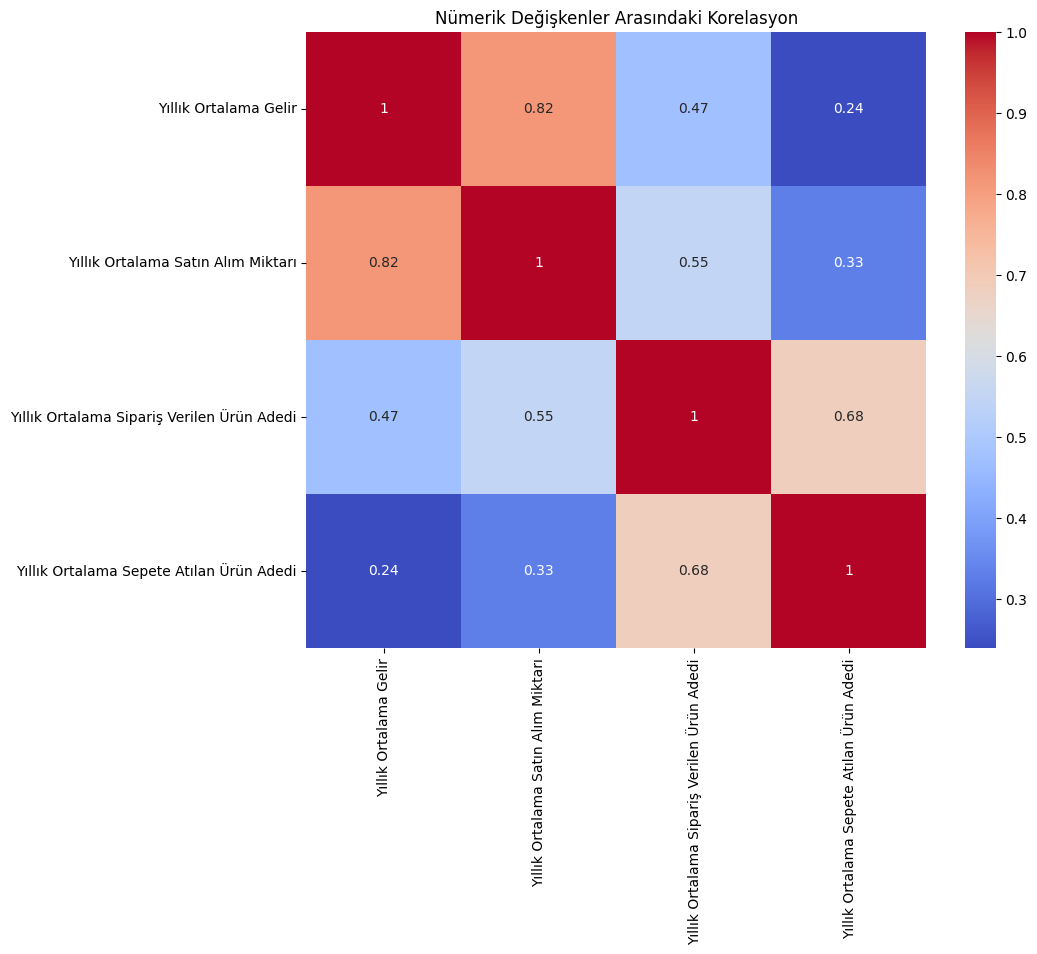

In [21]:
#Korelasyon matrisinde değişkenleri inceleyelim. Genellikle ağaç yönteminden gideceğimiz için
#sayısal değişkenlerin birbiriyle yüksek korelasyonlu olmasında çok da sıkıntı yoktur. Nereden ayrım
#yapılacağını o belirler çünkü. Eğer kategorik değişkenler olsaydı o zaman sıkıntı olabilirdi.
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Nümerik Değişkenler Arasındaki Korelasyon')
plt.show()

In [22]:
#Feature Extraction
df['New Aylık Ortalama Gelir'] = df['Yıllık Ortalama Gelir'] / 12
df['New Aylık Ortalama Satın Alım Miktarı'] = df['Yıllık Ortalama Satın Alım Miktarı'] / 12

In [23]:
df

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,13.525516,Büyük Şehir,Elektronik ve Teknolojik Ürünler,10.373863,3.645728,Etmiyor,obek_4,4.643784,1.127126,0.864489
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,12.414304,Küçük Şehir,Spor Malzemeleri,8.330075,2.530107,Etmiyor,obek_5,4.420959,1.034525,0.694173
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,12.500918,Küçük Şehir,Giyim,9.202850,4.031640,Ediyor,obek_8,4.960474,1.041743,0.766904
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,12.699924,Kırsal,Giyim,8.766983,2.798332,Etmiyor,obek_3,2.895768,1.058327,0.730582
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.892781,Büyük Şehir,Giyim,8.973055,2.753013,Etmiyor,obek_3,3.066678,1.074398,0.747755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,13.077482,Köy veya Kasaba,Kozmetik,10.673209,3.476808,Etmiyor,obek_6,3.962724,1.089790,0.889434
5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,13.085396,Köy veya Kasaba,Ev ve Mobilya,10.648017,3.306470,Etmiyor,obek_6,3.915826,1.090450,0.887335
5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,12.642535,Küçük Şehir,Ev ve Mobilya,8.445996,1.817574,Etmiyor,obek_1,2.354929,1.053545,0.703833
5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,12.493524,Büyük Şehir,Ev ve Mobilya,9.106885,3.694001,Ediyor,obek_8,4.971768,1.041127,0.758907


In [24]:
#Burada ve sonraki ifadelerde drop_first argümanını True girmemin nedeni dummy değişken tuzağını önlemektir.
#Burada kategorik değişkenlere numaralar veriyorum ki ağaç algoritmaları çalışabilsin.
df = pd.get_dummies(df, columns=['Cinsiyet'], drop_first=True)

In [25]:
df = pd.get_dummies(df, columns=['Medeni Durum'], drop_first=True)

In [26]:
df['Eğitim Düzeyi'].value_counts()

Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64

In [27]:
df['Eğitim Düzeyi'] = df['Eğitim Düzeyi'].apply(lambda level : 1 if level == 'Eğitimsiz'
                                                            else 2 if level == 'İlkokul Mezunu'
                                                            else 3 if level == 'Ortaokul Mezunu'
                                                            else 4 if level == 'Lise Mezunu'
                                                            else 5 if level == 'Yüksekokul Mezunu'
                                                            else 6 if level == 'Üniversite Mezunu'
                                                            else 7 if level == 'Yüksek Lisans Mezunu'
                                                            else 8 if level == 'Doktora Mezunu'
                                                            else 9 if level == 'Doktora Ötesi'
                                                            else 0)

In [28]:
df['Yaş Grubu'].value_counts()

18-30    1841
31-40    1477
51-60     861
41-50     727
>60       554
Name: Yaş Grubu, dtype: int64

In [29]:
df['Yaş Grubu'] = df['Yaş Grubu'].apply(lambda yas : 1 if yas == '18-30'
                                               else 2 if yas == '31-40'
                                               else 3 if yas == '41-50'
                                               else 4 if yas == '51-60'
                                               else 5 if yas == '>60'
                                               else 0)

In [30]:
df['İstihdam Durumu'].value_counts()

Düzenli ve Ücretli Bir İşi Var    2768
İşsiz veya Düzenli Bir İşi Yok    1349
Kendi İşinin Sahibi                879
Emekli                             464
Name: İstihdam Durumu, dtype: int64

In [31]:
df= pd.get_dummies(df, columns=['İstihdam Durumu'], drop_first=True)

In [32]:
df['Yaşadığı Şehir'].value_counts()

Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64

In [33]:
df['Yaşadığı Şehir'] = df['Yaşadığı Şehir'].apply(lambda sehir : 1 if sehir == 'Kırsal'
                                               else 2 if sehir == 'Köy veya Kasaba'
                                               else 3 if sehir == 'Küçük Şehir'
                                               else 4 if sehir == 'Büyük Şehir'
                                               else 0)

In [34]:
df['En Çok İlgilendiği Ürün Grubu'].value_counts()

Giyim                               1487
Ev ve Mobilya                       1114
Elektronik ve Teknolojik Ürünler    1029
Spor Malzemeleri                    1001
Kozmetik                             829
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64

In [35]:
df= pd.get_dummies(df, columns=['En Çok İlgilendiği Ürün Grubu'], drop_first=True)

In [36]:
df['Eğitime Devam Etme Durumu'].value_counts()

Etmiyor    4554
Ediyor      906
Name: Eğitime Devam Etme Durumu, dtype: int64

In [37]:
df= pd.get_dummies(df, columns=['Eğitime Devam Etme Durumu'], drop_first=True)

In [38]:
df

,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı,Cinsiyet_Kadın,Medeni Durum_Evli,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,2,7,13.525516,4,10.373863,3.645728,obek_4,4.643784,1.127126,0.864489,1,0,0,0,0,0,0,0,0,1
1,5,4,12.414304,3,8.330075,2.530107,obek_5,4.420959,1.034525,0.694173,0,1,0,1,0,0,0,0,1,1
2,1,4,12.500918,3,9.202850,4.031640,obek_8,4.960474,1.041743,0.766904,0,0,0,0,0,0,1,0,0,0
3,4,4,12.699924,1,8.766983,2.798332,obek_3,2.895768,1.058327,0.730582,0,1,0,1,0,0,1,0,0,1
4,2,3,12.892781,4,8.973055,2.753013,obek_3,3.066678,1.074398,0.747755,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5,6,13.077482,2,10.673209,3.476808,obek_6,3.962724,1.089790,0.889434,1,0,1,0,0,0,0,1,0,1
5456,4,9,13.085396,2,10.648017,3.306470,obek_6,3.915826,1.090450,0.887335,0,1,0,1,0,1,0,0,0,1
5457,4,2,12.642535,3,8.445996,1.817574,obek_1,2.354929,1.053545,0.703833,1,1,0,0,0,1,0,0,0,1
5458,1,5,12.493524,4,9.106885,3.694001,obek_8,4.971768,1.041127,0.758907,1,0,0,0,0,1,0,0,0,0


In [39]:
#Hedef değişkenin çıkarılması
df_X= df.drop(['Öbek İsmi'], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
#Uzaklık tabanlı ve Gradient Boosting algoritması gereken işlemlerde scaling yapılması gerkildiği
#için scaling işlemi yapıyorum.
sc = StandardScaler()
df_scaled = sc.fit_transform(df_X)

In [42]:
df_scaled

array([[-0.30637604,  1.09284079,  1.65984459, ..., -0.42309693,
        -0.47380354,  0.44603361],
       [ 1.90439026, -0.40701109, -0.46248231, ..., -0.42309693,
         2.11057941,  0.44603361],
       [-1.04329814, -0.40701109, -0.29705639, ..., -0.42309693,
        -0.47380354, -2.24198351],
       ...,
       [ 1.16746816, -1.40691233, -0.02657976, ..., -0.42309693,
        -0.47380354,  0.44603361],
       [-1.04329814,  0.09293954, -0.31117749, ..., -0.42309693,
        -0.47380354, -2.24198351],
       [-1.04329814,  0.09293954, -0.24395392, ..., -0.42309693,
         2.11057941, -2.24198351]])

In [43]:
scaled_columns = [col for col in df.columns if col not in 'Öbek İsmi']

In [44]:
scaled_columns

['Yaş Grubu',
 'Eğitim Düzeyi',
 'Yıllık Ortalama Gelir',
 'Yaşadığı Şehir',
 'Yıllık Ortalama Satın Alım Miktarı',
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
 'Yıllık Ortalama Sepete Atılan Ürün Adedi',
 'New Aylık Ortalama Gelir',
 'New Aylık Ortalama Satın Alım Miktarı',
 'Cinsiyet_Kadın',
 'Medeni Durum_Evli',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [45]:
scaled_df = pd.DataFrame(df_scaled, columns = scaled_columns)

In [46]:
scaled_df

,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı,Cinsiyet_Kadın,Medeni Durum_Evli,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,-0.306376,1.092841,1.659845,1.064019,1.167068,0.869302,0.722528,1.659845,1.167068,1.089725,-1.038849,-0.304753,-0.438041,-0.572839,-0.506288,-0.611781,-0.423097,-0.473804,0.446034
1,1.904390,-0.407011,-0.462482,0.049606,-1.096140,-0.622420,0.466320,-0.462482,-1.096140,-0.917663,0.962604,-0.304753,2.282894,-0.572839,-0.506288,-0.611781,-0.423097,2.110579,0.446034
2,-1.043298,-0.407011,-0.297056,0.049606,-0.129664,1.385314,1.086664,-0.297056,-0.129664,-0.917663,-1.038849,-0.304753,-0.438041,-0.572839,-0.506288,1.634571,-0.423097,-0.473804,-2.241984
3,1.167468,-0.407011,0.083028,-1.979221,-0.612325,-0.263770,-1.287372,0.083028,-0.612325,-0.917663,0.962604,-0.304753,2.282894,-0.572839,-0.506288,1.634571,-0.423097,-0.473804,0.446034
4,-0.306376,-0.906962,0.451371,1.064019,-0.384130,-0.324367,-1.090857,0.451371,-0.384130,-0.917663,0.962604,-0.304753,-0.438041,1.745693,-0.506288,1.634571,-0.423097,-0.473804,0.446034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,1.904390,0.592890,0.804135,-0.964808,1.498552,0.643436,-0.060567,0.804135,1.498552,1.089725,-1.038849,3.281347,-0.438041,-0.572839,-0.506288,-0.611781,2.363525,-0.473804,0.446034
5456,1.167468,2.092742,0.819251,-0.964808,1.470655,0.415673,-0.114491,0.819251,1.470655,-0.917663,0.962604,-0.304753,2.282894,-0.572839,1.975160,-0.611781,-0.423097,-0.473804,0.446034
5457,1.167468,-1.406912,-0.026580,0.049606,-0.967774,-1.575165,-1.909239,-0.026580,-0.967774,1.089725,0.962604,-0.304753,-0.438041,-0.572839,1.975160,-0.611781,-0.423097,-0.473804,0.446034
5458,-1.043298,0.092940,-0.311177,1.064019,-0.235932,0.933850,1.099649,-0.311177,-0.235932,1.089725,-1.038849,-0.304753,-0.438041,-0.572839,1.975160,-0.611781,-0.423097,-0.473804,-2.241984


In [47]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [48]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [49]:
y = df['Öbek İsmi']

In [50]:
#Çeşitli modeller kullanarak base halini hesaplıyorum.
def base_models(X, y, scoring='accuracy'):
    print('Base Models...')
    classifiers = [('KNN' , KNeighborsClassifier()),
                   ('SVC', SVC()),
                   ('AdaBoost', AdaBoostClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False)),
                   ('CART', DecisionTreeClassifier()),
                   ('LightGBM', LGBMClassifier()),
                   ('Logistic Regression',LogisticRegression())]
    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f'{scoring} : {round(cv_results["test_score"].mean(),4)} ({name})' )

In [51]:
base_models(scaled_df, y)

Base Models...
accuracy : 0.9205 (KNN)
accuracy : 0.9533 (SVC)
accuracy : 0.8963 (AdaBoost)
accuracy : 0.9546 (CatBoost)
accuracy : 0.8998 (CART)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 3640, number of used features: 19
[LightGBM] [Info] Start training from score -2.064174
[LightGBM] [Info] Start training from score -2.299842
[LightGBM] [Info] Start training from score -2.059854
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from score -2.047006
[LightGBM] [Info] Start training from score -2.072870
[LightGBM] [Info] Start training from score -2.062012
[LightGBM] [Info] Start training from sco

In [52]:
knn_params = {'n_neighbors' : range(2,50)}

cart_params = {'max_depth' : range(2,50),
               'min_samples_split' : range(2,30)}

rf_params = {'max_depth' : [8, 15, None],
             'max_features' : [5, 7, 'auto'],
             'min_samples_split' :[15, 20],
             'n_estimators' :[200, 300]}

ada_params = {'learning_rate' : [0.01, 0.001, 1.0],
              'n_estimators' : [50, 100, 200, 500]}

lightgbm_params = {'learning_rate' : [0.1, 0.01],
                   'n_estimators' : [300,500],
                   'colsample_bytree' : [0.7, 1]}

cat_params = {'max_depth' : [3, 4, 5],
              'n_estimators' : [100,200,300]}

logreg_params={'C': [0.1, 1, 10, 100],
                'max_iter': [100, 300, 500]}

classifiers = [    ('KNN', KNeighborsClassifier(), knn_params),
                   ('CART', DecisionTreeClassifier(), cart_params),
                   ('Ada', AdaBoostClassifier(), ada_params),
                   ('CatBoost', CatBoostClassifier(), cat_params),
                   ('RF', RandomForestClassifier(), rf_params),
                   ('LogReg', LogisticRegression(), logreg_params),
                   ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [53]:
#Yukarıda görülen parametreler ile hiperparametre optimizasyonu yapıyorum ve modelleri
#iyileştirmeye çalışıyorum.
def hyperparameter_optimization(X, y, cv=3, scoring = 'accuracy'):
    print('Hyperparameter Optimization.....')
    best_models = {}
    for name, classifier, params in classifiers:
        print(f'############### {name} ############')
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before) : {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs= -1, verbose=False).fit(X,y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv,scoring=scoring)
        print(f"{scoring} (After) : {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params : {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [54]:
best_models = hyperparameter_optimization(scaled_df, y)

Hyperparameter Optimization.....
############### KNN ############
accuracy (Before) : 0.9205
accuracy (After) : 0.9205
KNN best params : {'n_neighbors': 5}

############### CART ############
accuracy (Before) : 0.8967
accuracy (After) : 0.948
CART best params : {'max_depth': 6, 'min_samples_split': 5}

############### Ada ############
accuracy (Before) : 0.8963
accuracy (After) : 0.9522
Ada best params : {'learning_rate': 0.01, 'n_estimators': 500}

############### CatBoost ############
Learning rate set to 0.084516
0:	learn: 1.6566595	total: 33.8ms	remaining: 33.7s
1:	learn: 1.3841510	total: 57.2ms	remaining: 28.5s
2:	learn: 1.2041192	total: 85.6ms	remaining: 28.4s
3:	learn: 1.0668592	total: 115ms	remaining: 28.6s
4:	learn: 0.9533372	total: 145ms	remaining: 28.9s
5:	learn: 0.8621775	total: 174ms	remaining: 28.8s
6:	learn: 0.7864737	total: 202ms	remaining: 28.6s
7:	learn: 0.7222782	total: 230ms	remaining: 28.6s
8:	learn: 0.6691649	total: 259ms	remaining: 28.5s
9:	learn: 0.6231219	total

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

accuracy (After) : 0.9548
RF best params : {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 200}

############### LogReg ############
accuracy (Before) : 0.9482
accuracy (After) : 0.9485
LogReg best params : {'C': 10, 'max_iter': 100}

############### LightGBM ############
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 3640, number of used features: 19
[LightGBM] [Info] Start training from score -2.064174
[LightGBM] [Info] Start training from score -2.299842
[LightGBM] [Info] Start training from score -2.059854
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from scor

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 5460, number of used features: 19
[LightGBM] [Info] Start training from score -2.065618
[LightGBM] [Info] Start training from score -2.300755
[LightGBM] [Info] Start training from score -2.061292
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from score -2.045589
[LightGBM] [Info] Start training from score -2.071415
[LightGBM] [Info] Start training from score -2.061292
[LightGBM] [Info] Start training from score -2.030128
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-thr

In [55]:
best_models

{'KNN': KNeighborsClassifier(),
 'CART': DecisionTreeClassifier(max_depth=6, min_samples_split=5),
 'Ada': AdaBoostClassifier(learning_rate=0.01, n_estimators=500),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x7cf4e9faabc0>,
 'RF': RandomForestClassifier(max_depth=8, max_features='auto', min_samples_split=15,
                        n_estimators=200),
 'LogReg': LogisticRegression(C=10),
 'LightGBM': LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, n_estimators=500)}

In [56]:
#Voting Classifier kullanarak birden fazla algoritmanın oylama usülü ile çalışmasını sağlıyorum.
#Burada çoğunluğun gücünü kullanıyorum. İstatistiksel olarak modeli daha iyi yapar.
def voting_classifier(best_models, X, y):
    print('Voting Classifier...')
    voting_clf = VotingClassifier(estimators = [('KNN', best_models["KNN"]),
                                                ('RF',best_models["RF"]),
                                                ('LightGBM', best_models["LightGBM"])],
                                  voting = 'soft').fit(X,y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring = ['accuracy'])
    print(f"Accuracy : {cv_results['test_accuracy'].mean()}")
    return voting_clf

In [57]:
voting_cls = voting_classifier(best_models, scaled_df, y)

Voting Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 5460, number of used features: 19
[LightGBM] [Info] Start training from score -2.065618
[LightGBM] [Info] Start training from score -2.300755
[LightGBM] [Info] Start training from score -2.061292
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from score -2.045589
[LightGBM] [Info] Start training from score -2.071415
[LightGBM] [Info] Start training from score -2.061292
[LightGBM] [Info] Start training from score -2.030128


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 3640, number of used features: 19
[LightGBM] [Info] Start training from score -2.064174
[LightGBM] [Info] Start training from score -2.299842
[LightGBM] [Info] Start training from score -2.059854
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from score -2.047006
[LightGBM] [Info] Start training from score -2.072870
[LightGBM] [Info] Start training from score -2.062012
[LightGBM] [Info] Start training from score -2.030128


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 3640, number of used features: 19
[LightGBM] [Info] Start training from score -2.066341
[LightGBM] [Info] Start training from score -2.299842
[LightGBM] [Info] Start training from score -2.062012
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from score -2.044881
[LightGBM] [Info] Start training from score -2.070689
[LightGBM] [Info] Start training from score -2.062012
[LightGBM] [Info] Start training from score -2.030128


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 3640, number of used features: 19
[LightGBM] [Info] Start training from score -2.066341
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.062012
[LightGBM] [Info] Start training from score -2.025953
[LightGBM] [Info] Start training from score -2.044881
[LightGBM] [Info] Start training from score -2.070689
[LightGBM] [Info] Start training from score -2.059854
[LightGBM] [Info] Start training from score -2.030128
Accuracy : 0.9547619047619048


In [58]:
#Test verisini çekip yukarıdaki veri görselleştirme ve veri işleme işlerinin aynısını
#test verisine uyguluyorum.
df_test = pd.read_csv('/content/drive/MyDrive/datathon2023/test_x.csv')

In [59]:
veriyi_incele(df_test)

########## Verinin Shape'i ##########
(2340, 13)
########## Veride Boş Veri Var Mı ##########
index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64
########## Değişkenlerin Tipi ##########
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzey

In [60]:
cat, cat_but_num, num = degisken_ayir(df_test)
print('Kategorik Değişkenler : ')
print(cat)
print('Kategorik Gibi Görünen Nümerik Değişkenler : ')
print(cat_but_num)
print('Nümerik Değişkenler : ')
print(num)

Kategorik Değişkenler : 
['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']
Kategorik Gibi Görünen Nümerik Değişkenler : 
[]
Nümerik Değişkenler : 
['index', 'Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']


In [61]:
for col in cat :
    print(f"Değişken Adı : {col}, Değişken Tipi : {df_test[col].dtypes}, Değişken Unique Sayısı : {df_test[col].nunique()}")
for col in cat_but_num :
    print(f"Değişken Adı : {col}, Değişken Tipi : {df_test[col].dtypes}, Değişken Unique Sayısı : {df_test[col].nunique()}")
for col in num :
    print(f"Değişken Adı : {col}, Değişken Tipi : {df_test[col].dtypes}, Değişken Unique Sayısı : {df_test[col].nunique()}")

Değişken Adı : Cinsiyet, Değişken Tipi : object, Değişken Unique Sayısı : 2
Değişken Adı : Yaş Grubu, Değişken Tipi : object, Değişken Unique Sayısı : 5
Değişken Adı : Medeni Durum, Değişken Tipi : object, Değişken Unique Sayısı : 2
Değişken Adı : Eğitim Düzeyi, Değişken Tipi : object, Değişken Unique Sayısı : 9
Değişken Adı : İstihdam Durumu, Değişken Tipi : object, Değişken Unique Sayısı : 4
Değişken Adı : Yaşadığı Şehir, Değişken Tipi : object, Değişken Unique Sayısı : 4
Değişken Adı : En Çok İlgilendiği Ürün Grubu, Değişken Tipi : object, Değişken Unique Sayısı : 5
Değişken Adı : Eğitime Devam Etme Durumu, Değişken Tipi : object, Değişken Unique Sayısı : 2
Değişken Adı : index, Değişken Tipi : int64, Değişken Unique Sayısı : 2340
Değişken Adı : Yıllık Ortalama Gelir, Değişken Tipi : float64, Değişken Unique Sayısı : 2340
Değişken Adı : Yıllık Ortalama Satın Alım Miktarı, Değişken Tipi : float64, Değişken Unique Sayısı : 2340
Değişken Adı : Yıllık Ortalama Sipariş Verilen Ürün Adedi

In [62]:
for col in num:
    print(iqr(df_test, col))

(-3040.7, 5379.699999999999)
(-973428.106252766, 2025865.2972707257)
(-52818.352448431884, 97852.60671898312)
(-66.42873509774215, 121.14224864856304)
(-207.57113459220815, 370.99248791467085)


In [63]:
for col in num:
    print(col, aykiri_iqr(df_test, col))

index False
Yıllık Ortalama Gelir False
Yıllık Ortalama Satın Alım Miktarı False
Yıllık Ortalama Sipariş Verilen Ürün Adedi False
Yıllık Ortalama Sepete Atılan Ürün Adedi False


<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].any(None):
<ipython-input-12-719f6cfb8b97>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if df[(df[col] < down) | (df[col] > up)].a

In [64]:
#Bunun trainden farkı groupby yapılmadı çünkü öbek bilgisi yok. Onun dışında her şey aynı.
def numerik_analiz_test(df, col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]
    print(df[col].describe(quantiles).T)
    min_value = df[col].min()
    if min_value < 0:
        df[col] = np.log(df[col] - min_value + 1)
    else:
        df[col] = np.log(df[col] + 1)
    if plot:
        df[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()

count    2340.000000
mean     1169.500000
std       675.644137
min         0.000000
5%        116.950000
10%       233.900000
20%       467.800000
30%       701.700000
40%       935.600000
50%      1169.500000
60%      1403.400000
70%      1637.300000
80%      1871.200000
90%      2105.100000
100%     2339.000000
max      2339.000000
Name: index, dtype: float64


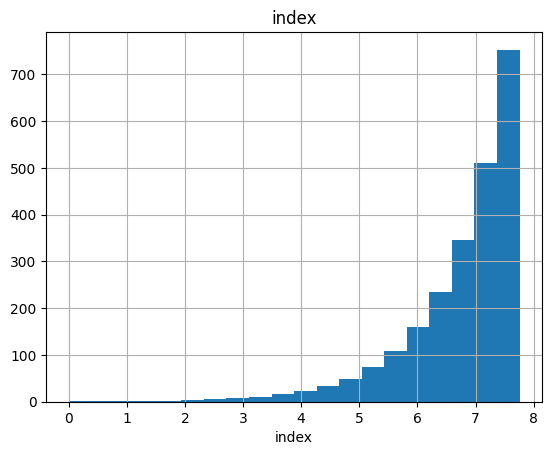

count    2.340000e+03
mean     3.622524e+05
std      2.232063e+05
min      8.065675e+04
5%       1.513069e+05
10%      1.717497e+05
20%      1.999000e+05
30%      2.241447e+05
40%      2.468257e+05
50%      2.836947e+05
60%      3.427497e+05
70%      3.683822e+05
80%      4.833181e+05
90%      7.652526e+05
100%     1.229399e+06
max      1.229399e+06
Name: Yıllık Ortalama Gelir, dtype: float64


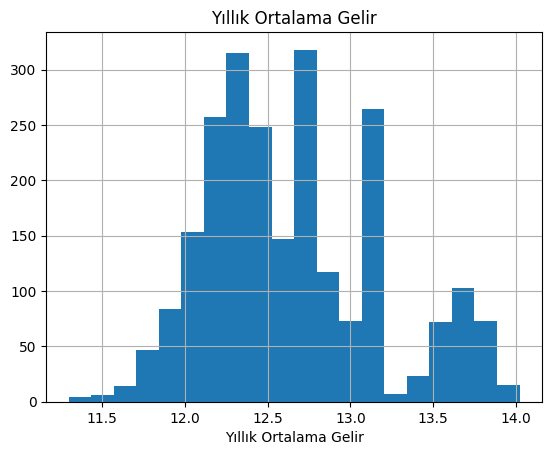

count     2340.000000
mean     16674.303935
std      14266.101056
min       2870.657175
5%        3683.257239
10%       3945.149340
20%       4404.897454
30%       5341.944656
40%       6389.769653
50%       8186.095300
60%       9719.338185
70%      28055.169410
80%      33535.720796
90%      38930.500623
100%     46380.542188
max      46380.542188
Name: Yıllık Ortalama Satın Alım Miktarı, dtype: float64


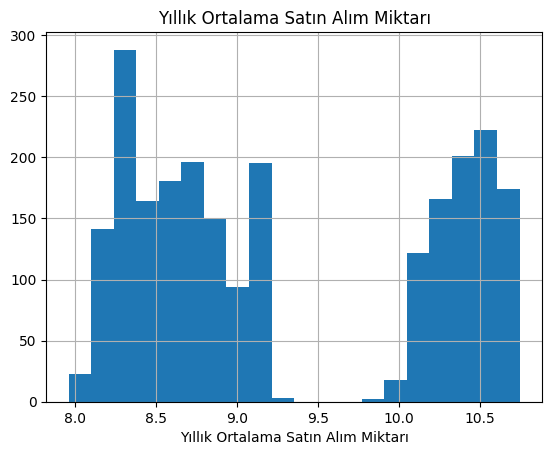

count    2340.000000
mean       23.465787
std        14.559035
min         0.000000
5%          3.910384
10%         6.886049
20%        10.122461
30%        14.070108
40%        16.226121
50%        20.094319
60%        24.060556
70%        30.246210
80%        38.671223
90%        45.234767
100%       64.017477
max        64.017477
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: float64


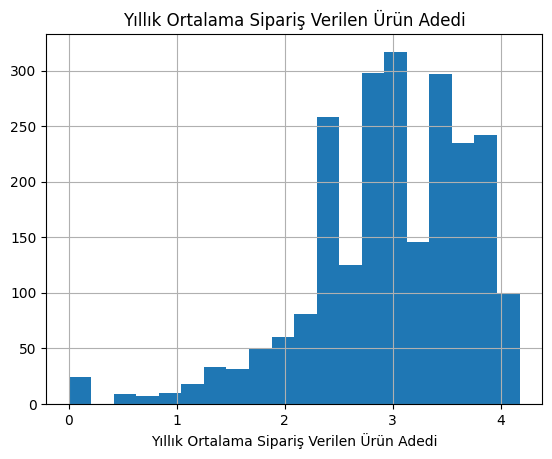

count    2340.000000
mean       72.078920
std        46.311708
min         5.283642
5%          9.390224
10%        11.516289
20%        20.012997
30%        43.704435
40%        51.550315
50%        71.033886
60%        94.124343
70%       101.035056
80%       108.105245
90%       125.766835
100%      237.768581
max       237.768581
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: float64


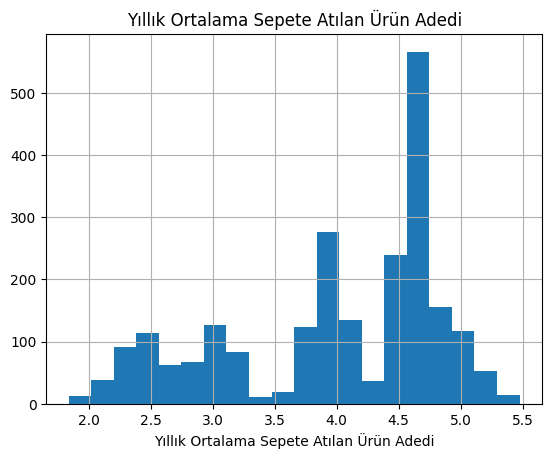

In [65]:
for col in num:
    numerik_analiz_test(df_test, col, plot=True)

In [66]:
df_test = df_test.drop(columns='index',axis=1)

In [67]:
#Feature Extraction
df_test['New Aylık Ortalama Gelir'] = df_test['Yıllık Ortalama Gelir'] / 12
df_test['New Aylık Ortalama Satın Alım Miktarı'] = df_test['Yıllık Ortalama Satın Alım Miktarı'] / 12

<ipython-input-68-5994fee64929>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_test.corr()


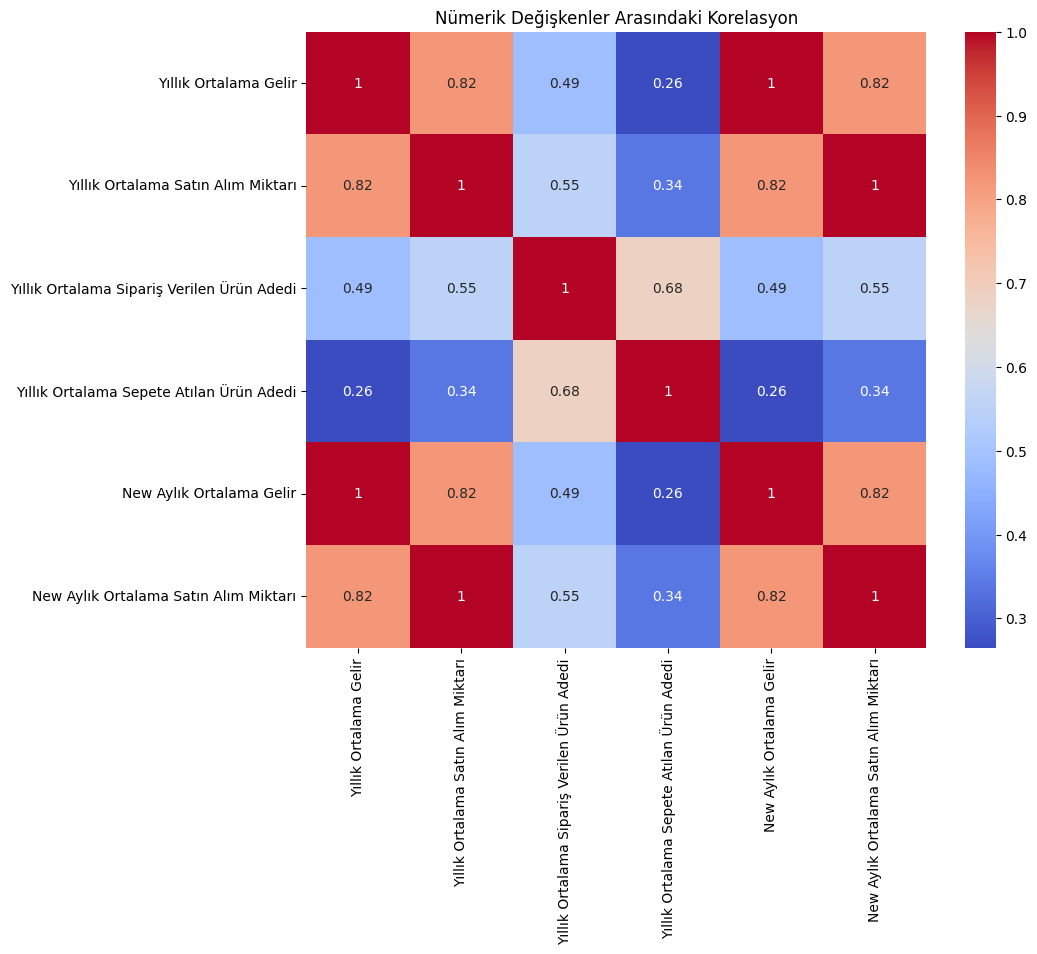

In [68]:
corr_matrix = df_test.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Nümerik Değişkenler Arasındaki Korelasyon')
plt.show()

In [69]:
df_test

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,12.808564,Köy veya Kasaba,Giyim,8.624717,2.799878,Etmiyor,3.027544,1.067380,0.718726
1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.935793,Büyük Şehir,Spor Malzemeleri,8.818448,2.769913,Etmiyor,3.028967,1.077983,0.734871
2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,11.937061,Küçük Şehir,Giyim,8.410702,2.477205,Etmiyor,3.869210,0.994755,0.700892
3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,13.100228,Köy veya Kasaba,Kozmetik,10.661290,3.506549,Etmiyor,3.893525,1.091686,0.888441
4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,12.687377,Küçük Şehir,Giyim,8.692871,1.708372,Etmiyor,2.621220,1.057281,0.724406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,Kadın,18-30,Bekar,Yüksekokul Mezunu,Kendi İşinin Sahibi,12.465321,Küçük Şehir,Ev ve Mobilya,9.165359,3.758491,Ediyor,4.775991,1.038777,0.763780
2336,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.178607,Kırsal,Ev ve Mobilya,8.311701,3.048467,Etmiyor,3.842879,1.014884,0.692642
2337,Erkek,>60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,12.787538,Büyük Şehir,Ev ve Mobilya,10.025272,2.991840,Etmiyor,4.621943,1.065628,0.835439
2338,Erkek,18-30,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,12.269895,Küçük Şehir,Spor Malzemeleri,8.344360,2.464543,Etmiyor,4.592884,1.022491,0.695363


In [70]:
df_test = pd.get_dummies(df_test, columns=['Cinsiyet'], drop_first=True)

In [71]:
df_test = pd.get_dummies(df_test, columns=['Medeni Durum'], drop_first=True)

In [72]:
df_test['Eğitim Düzeyi'] = df_test['Eğitim Düzeyi'].apply(lambda level : 1 if level == 'Eğitimsiz'
                                                            else 2 if level == 'İlkokul Mezunu'
                                                            else 3 if level == 'Ortaokul Mezunu'
                                                            else 4 if level == 'Lise Mezunu'
                                                            else 5 if level == 'Yüksekokul Mezunu'
                                                            else 6 if level == 'Üniversite Mezunu'
                                                            else 7 if level == 'Yüksek Lisans Mezunu'
                                                            else 8 if level == 'Doktora Mezunu'
                                                            else 9 if level == 'Doktora Ötesi'
                                                            else 0)

In [73]:
df_test['Yaş Grubu'] = df_test['Yaş Grubu'].apply(lambda yas : 1 if yas == '18-30'
                                               else 2 if yas == '31-40'
                                               else 3 if yas == '41-50'
                                               else 4 if yas == '51-60'
                                               else 5 if yas == '>60'
                                               else 0)

In [74]:
df_test= pd.get_dummies(df_test, columns=['İstihdam Durumu'], drop_first=True)

In [75]:
df_test['Yaşadığı Şehir'] = df_test['Yaşadığı Şehir'].apply(lambda sehir : 1 if sehir == 'Kırsal'
                                               else 2 if sehir == 'Köy veya Kasaba'
                                               else 3 if sehir == 'Küçük Şehir'
                                               else 4 if sehir == 'Büyük Şehir'
                                               else 0)

In [76]:
df_test= pd.get_dummies(df_test, columns=['En Çok İlgilendiği Ürün Grubu'], drop_first=True)

In [77]:
df_test= pd.get_dummies(df_test, columns=['Eğitime Devam Etme Durumu'], drop_first=True)

In [78]:
df_test

,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı,Cinsiyet_Kadın,Medeni Durum_Evli,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,4,7,12.808564,2,8.624717,2.799878,3.027544,1.067380,0.718726,0,1,0,0,0,0,1,0,0,1
1,3,4,12.935793,4,8.818448,2.769913,3.028967,1.077983,0.734871,0,0,0,0,1,0,0,0,1,1
2,5,1,11.937061,3,8.410702,2.477205,3.869210,0.994755,0.700892,1,1,0,0,1,0,1,0,0,1
3,4,9,13.100228,2,10.661290,3.506549,3.893525,1.091686,0.888441,1,1,0,0,0,0,0,1,0,1
4,1,7,12.687377,3,8.692871,1.708372,2.621220,1.057281,0.724406,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,5,12.465321,3,9.165359,3.758491,4.775991,1.038777,0.763780,1,0,0,1,0,1,0,0,0,0
2336,2,4,12.178607,1,8.311701,3.048467,3.842879,1.014884,0.692642,1,1,0,0,1,1,0,0,0,1
2337,5,7,12.787538,4,10.025272,2.991840,4.621943,1.065628,0.835439,0,1,0,0,0,1,0,0,0,1
2338,1,9,12.269895,3,8.344360,2.464543,4.592884,1.022491,0.695363,0,1,0,0,0,0,0,0,1,1


In [79]:
sc = StandardScaler()
df_scaled_test = sc.fit_transform(df_test)

In [80]:
df_scaled_test

array([[ 1.08200222,  1.1023239 ,  0.30191339, ..., -0.4023269 ,
        -0.47650625,  0.43546398],
       [ 0.35108848, -0.37954392,  0.54378257, ..., -0.4023269 ,
         2.09860836,  0.43546398],
       [ 1.81291597, -1.86141175, -1.35486118, ..., -0.4023269 ,
        -0.47650625,  0.43546398],
       ...,
       [ 1.81291597,  1.1023239 ,  0.26194125, ..., -0.4023269 ,
        -0.47650625,  0.43546398],
       [-1.110739  ,  2.09023578, -0.72212564, ..., -0.4023269 ,
         2.09860836,  0.43546398],
       [ 1.08200222,  0.60836796,  0.96941681, ..., -0.4023269 ,
        -0.47650625, -2.29640119]])

In [81]:
scaled_df = pd.DataFrame(df_scaled_test, columns = df_test.columns)

In [82]:
scaled_df

,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı,Cinsiyet_Kadın,Medeni Durum_Evli,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,1.082002,1.102324,0.301913,-0.997593,-0.751745,-0.229246,-1.122325,0.301913,-0.751745,-0.933809,0.935414,-0.293855,-0.422896,-0.591169,-0.534522,1.636840,-0.402327,-0.476506,0.435464
1,0.351088,-0.379544,0.543783,1.051896,-0.540225,-0.269083,-1.120681,0.543783,-0.540225,-0.933809,-1.069045,-0.293855,-0.422896,1.691563,-0.534522,-0.610933,-0.402327,2.098608,0.435464
2,1.812916,-1.861412,-1.354861,0.027151,-0.985412,-0.658227,-0.149681,-1.354861,-0.985412,1.070882,0.935414,-0.293855,-0.422896,1.691563,-0.534522,1.636840,-0.402327,-0.476506,0.435464
3,1.082002,2.090236,0.856382,-0.997593,1.471840,0.710245,-0.121582,0.856382,1.471840,1.070882,0.935414,-0.293855,-0.422896,-0.591169,-0.534522,-0.610933,2.485541,-0.476506,0.435464
4,-1.110739,1.102324,0.071530,0.027151,-0.677333,-1.680360,-1.591880,0.071530,-0.677333,-0.933809,0.935414,-0.293855,2.364646,-0.591169,-0.534522,1.636840,-0.402327,-0.476506,0.435464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,-1.110739,0.114412,-0.350611,0.027151,-0.161457,1.045193,0.898210,-0.350611,-0.161457,1.070882,-1.069045,-0.293855,2.364646,-0.591169,1.870829,-0.610933,-0.402327,-0.476506,-2.296401
2336,-0.379825,-0.379544,-0.895670,-2.022337,-1.093504,0.101244,-0.180110,-0.895670,-1.093504,1.070882,0.935414,-0.293855,-0.422896,1.691563,1.870829,-0.610933,-0.402327,-0.476506,0.435464
2337,1.812916,1.102324,0.261941,1.051896,0.777418,0.025960,0.720190,0.261941,0.777418,-0.933809,0.935414,-0.293855,-0.422896,-0.591169,1.870829,-0.610933,-0.402327,-0.476506,0.435464
2338,-1.110739,2.090236,-0.722126,0.027151,-1.057846,-0.675060,0.686609,-0.722126,-1.057846,-0.933809,0.935414,-0.293855,-0.422896,-0.591169,-0.534522,-0.610933,-0.402327,2.098608,0.435464


In [83]:
#scaled_df değişkenini Voting Classifier'a sokarak tahmin oluşturup onu csv dosyası haline getirip indirdim.
tahmin = voting_cls.predict(scaled_df)

In [84]:
print(tahmin)

['obek_3' 'obek_3' 'obek_2' ... 'obek_7' 'obek_5' 'obek_6']


In [91]:
tahmin.shape

(2340,)

In [94]:
veri = {
    'id': range(2340),
    'Öbek İsmi': tahmin
}
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7


In [97]:
type(df_test)

pandas.core.frame.DataFrame

In [99]:
type(Tahmin_Dataframe)

pandas.core.frame.DataFrame

In [104]:
result = pd.concat([df_test, Tahmin_Dataframe], axis = 1)


In [105]:
result

,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,New Aylık Ortalama Gelir,New Aylık Ortalama Satın Alım Miktarı,Cinsiyet_Kadın,Medeni Durum_Evli,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor,Öbek İsmi
0,4,7,12.808564,2,8.624717,2.799878,3.027544,1.067380,0.718726,0,1,0,0,0,0,1,0,0,1,obek_3
1,3,4,12.935793,4,8.818448,2.769913,3.028967,1.077983,0.734871,0,0,0,0,1,0,0,0,1,1,obek_3
2,5,1,11.937061,3,8.410702,2.477205,3.869210,0.994755,0.700892,1,1,0,0,1,0,1,0,0,1,obek_2
3,4,9,13.100228,2,10.661290,3.506549,3.893525,1.091686,0.888441,1,1,0,0,0,0,0,1,0,1,obek_6
4,1,7,12.687377,3,8.692871,1.708372,2.621220,1.057281,0.724406,0,1,0,1,0,0,1,0,0,1,obek_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,5,12.465321,3,9.165359,3.758491,4.775991,1.038777,0.763780,1,0,0,1,0,1,0,0,0,0,obek_8
2336,2,4,12.178607,1,8.311701,3.048467,3.842879,1.014884,0.692642,1,1,0,0,1,1,0,0,0,1,obek_2
2337,5,7,12.787538,4,10.025272,2.991840,4.621943,1.065628,0.835439,0,1,0,0,0,1,0,0,0,1,obek_7
2338,1,9,12.269895,3,8.344360,2.464543,4.592884,1.022491,0.695363,0,1,0,0,0,0,0,0,1,1,obek_5


In [106]:
df_t = pd.read_csv('/content/drive/MyDrive/datathon2023/test_x.csv')

In [107]:
df_t = pd.concat([df_t, Tahmin_Dataframe], axis = 1)


In [109]:
df_t = df_t.drop(columns='index', axis=1)

In [110]:
df_t

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Öbek İsmi
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460,obek_3
1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863,obek_3
2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518,obek_2
3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609,obek_6
4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491,obek_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,Kadın,18-30,Bekar,Yüksekokul Mezunu,Kendi İşinin Sahibi,259190.078834,Küçük Şehir,Ev ve Mobilya,9559.156534,41.883661,Ediyor,117.627785,obek_8
2336,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,194580.563177,Kırsal,Ev ve Mobilya,4070.232154,20.082996,Etmiyor,45.659622,obek_2
2337,Erkek,>60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,357730.521969,Büyük Şehir,Ev ve Mobilya,22589.204381,18.922305,Etmiyor,100.691379,obek_7
2338,Erkek,18-30,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,213179.637202,Küçük Şehir,Spor Malzemeleri,4205.390562,10.758108,Etmiyor,97.778913,obek_5


In [214]:
bir = df_t[df_t['Öbek İsmi'] == 'obek_1']

In [215]:
cat, cat_but_num, num = degisken_ayir(bir)

In [216]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [218]:
for col in cat:
  print(f'######### {col} ##########')
  print(bir[col].value_counts())
  print('###########################')

for col in num:
  print(col, bir[col].mean())

######### Cinsiyet ##########
Erkek    167
Kadın    145
Name: Cinsiyet, dtype: int64
###########################
######### Yaş Grubu ##########
41-50    76
31-40    75
18-30    66
51-60    65
>60      30
Name: Yaş Grubu, dtype: int64
###########################
######### Medeni Durum ##########
Evli     186
Bekar    126
Name: Medeni Durum, dtype: int64
###########################
######### Eğitim Düzeyi ##########
İlkokul Mezunu          73
Ortaokul Mezunu         69
Eğitimsiz               57
Lise Mezunu             55
Yüksek Lisans Mezunu    16
Doktora Ötesi           12
Yüksekokul Mezunu       11
Doktora Mezunu          10
Üniversite Mezunu        9
Name: Eğitim Düzeyi, dtype: int64
###########################
######### İstihdam Durumu ##########
Düzenli ve Ücretli Bir İşi Var    161
İşsiz veya Düzenli Bir İşi Yok     87
Kendi İşinin Sahibi                64
Name: İstihdam Durumu, dtype: int64
###########################
######### Yaşadığı Şehir ##########
Küçük Şehir        122
Büy

In [136]:
iki = df_t[df_t['Öbek İsmi'] == 'obek_2']

In [219]:
cat, cat_but_num, num = degisken_ayir(iki)

In [220]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [221]:
for col in cat:
  print(f'######### {col} ##########')
  print(iki[col].value_counts())
  print('##########################')

for col in num:
  print(col , iki[col].mean())

######### Cinsiyet ##########
Kadın    266
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
51-60    65
31-40    56
>60      51
41-50    51
18-30    43
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Evli     209
Bekar     57
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Lise Mezunu             65
Ortaokul Mezunu         54
Eğitimsiz               46
İlkokul Mezunu          45
Doktora Ötesi           15
Yüksekokul Mezunu       14
Yüksek Lisans Mezunu    11
Üniversite Mezunu       10
Doktora Mezunu           6
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
İşsiz veya Düzenli Bir İşi Yok    214
Düzenli ve Ücretli Bir İşi Var     38
Kendi İşinin Sahibi                14
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Şehir ##########
Küçük Şehir        119
Köy veya Kasaba     6

In [222]:
uc = df_t[df_t['Öbek İsmi'] == 'obek_3']

In [223]:
cat, cat_but_num, num = degisken_ayir(uc)

In [224]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [225]:
for col in cat:
  print(f'######### {col} ##########')
  print(uc[col].value_counts())
  print('##########################')

for col in num:
  print(col , uc[col].mean())

######### Cinsiyet ##########
Erkek    264
Kadın     23
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
>60      68
51-60    59
41-50    57
18-30    53
31-40    50
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Evli     238
Bekar     49
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Lise Mezunu             141
Eğitimsiz                37
Ortaokul Mezunu          35
Yüksekokul Mezunu        24
İlkokul Mezunu           18
Üniversite Mezunu        16
Yüksek Lisans Mezunu      8
Doktora Ötesi             4
Doktora Mezunu            4
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
Düzenli ve Ücretli Bir İşi Var    117
Kendi İşinin Sahibi                77
İşsiz veya Düzenli Bir İşi Yok     65
Emekli                             28
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Ş

In [226]:
dort = df_t[df_t['Öbek İsmi'] == 'obek_4']

In [227]:
cat, cat_but_num, num = degisken_ayir(dort)

In [228]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [229]:
for col in cat:
  print(f'######### {col} ##########')
  print(dort[col].value_counts())
  print('##########################')

for col in num:
  print(col , dort[col].mean())

######### Cinsiyet ##########
Kadın    155
Erkek    141
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
31-40    185
18-30    111
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Bekar    235
Evli      61
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Üniversite Mezunu       131
Yüksek Lisans Mezunu     62
Yüksekokul Mezunu        38
Doktora Mezunu           26
Doktora Ötesi            16
Ortaokul Mezunu           7
İlkokul Mezunu            7
Lise Mezunu               5
Eğitimsiz                 4
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
Düzenli ve Ücretli Bir İşi Var    155
İşsiz veya Düzenli Bir İşi Yok    105
Kendi İşinin Sahibi                36
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Şehir ##########
Büyük Şehir        267
Kırsal              15
Köy veya K

In [230]:
bes = df_t[df_t['Öbek İsmi'] == 'obek_5']

In [231]:
cat, cat_but_num, num = degisken_ayir(bes)

In [232]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [233]:
for col in cat:
  print(f'######### {col} ##########')
  print(bes[col].value_counts())
  print('##########################')

for col in num:
  print(col , bes[col].mean())

######### Cinsiyet ##########
Erkek    241
Kadın     52
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
31-40    157
18-30     94
41-50     19
51-60     13
>60       10
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Bekar    174
Evli     119
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Lise Mezunu             218
Üniversite Mezunu        13
Doktora Mezunu           12
Doktora Ötesi            11
Yüksek Lisans Mezunu     10
Yüksekokul Mezunu        10
İlkokul Mezunu            9
Ortaokul Mezunu           7
Eğitimsiz                 3
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
Düzenli ve Ücretli Bir İşi Var    188
Kendi İşinin Sahibi                58
İşsiz veya Düzenli Bir İşi Yok     47
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Şehir ##########
Küçük Şehir      

In [234]:
alti = df_t[df_t['Öbek İsmi'] == 'obek_6']

In [235]:
cat, cat_but_num, num = degisken_ayir(alti)

In [236]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [237]:
for col in cat:
  print(f'######### {col} ##########')
  print(alti[col].value_counts())
  print('##########################')

for col in num:
  print(col , alti[col].mean())


######### Cinsiyet ##########
Kadın    156
Erkek    147
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
51-60    188
>60       85
41-50     19
31-40      6
18-30      5
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Evli     215
Bekar     88
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Üniversite Mezunu       174
Yüksek Lisans Mezunu     30
Yüksekokul Mezunu        22
Doktora Mezunu           17
Doktora Ötesi            15
Lise Mezunu              14
Ortaokul Mezunu          12
İlkokul Mezunu           11
Eğitimsiz                 8
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
Emekli                            148
Düzenli ve Ücretli Bir İşi Var    105
Kendi İşinin Sahibi                50
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Şehir ##########
Köy veya Kasaba  

In [238]:
yedi = df_t[df_t['Öbek İsmi'] == 'obek_7']

In [239]:
cat, cat_but_num, num = degisken_ayir(yedi)

In [240]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [241]:
for col in cat:
  print(f'######### {col} ##########')
  print(yedi[col].value_counts())
  print('##########################')

for col in num:
  print(col , yedi[col].mean())

######### Cinsiyet ##########
Erkek    157
Kadın    149
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
41-50    111
31-40    102
18-30     61
>60       17
51-60     15
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Evli     190
Bekar    116
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Yüksek Lisans Mezunu    101
Üniversite Mezunu        82
Doktora Mezunu           32
Yüksekokul Mezunu        22
Eğitimsiz                18
Ortaokul Mezunu          16
Lise Mezunu              15
Doktora Ötesi            11
İlkokul Mezunu            9
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
Düzenli ve Ücretli Bir İşi Var    266
Kendi İşinin Sahibi                30
Emekli                             10
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Şehir ##########
Büyük Şehir      

In [242]:
sekiz = df_t[df_t['Öbek İsmi'] == 'obek_8']

In [243]:
cat, cat_but_num, num = degisken_ayir(sekiz)

In [244]:
cat = [col for col in cat if col not in 'Öbek İsmi']

In [245]:
for col in cat:
  print(f'######### {col} ##########')
  print(sekiz[col].value_counts())
  print('##########################')

for col in num:
  print(col , sekiz[col].mean())

######### Cinsiyet ##########
Kadın    144
Erkek    133
Name: Cinsiyet, dtype: int64
##########################
######### Yaş Grubu ##########
18-30    277
Name: Yaş Grubu, dtype: int64
##########################
######### Medeni Durum ##########
Bekar    247
Evli      30
Name: Medeni Durum, dtype: int64
##########################
######### Eğitim Düzeyi ##########
Yüksekokul Mezunu       92
Üniversite Mezunu       71
Lise Mezunu             69
Yüksek Lisans Mezunu    28
Ortaokul Mezunu          8
İlkokul Mezunu           5
Eğitimsiz                4
Name: Eğitim Düzeyi, dtype: int64
##########################
######### İstihdam Durumu ##########
Düzenli ve Ücretli Bir İşi Var    163
İşsiz veya Düzenli Bir İşi Yok     88
Kendi İşinin Sahibi                26
Name: İstihdam Durumu, dtype: int64
##########################
######### Yaşadığı Şehir ##########
Büyük Şehir        144
Küçük Şehir        124
Köy veya Kasaba      9
Name: Yaşadığı Şehir, dtype: int64
##########################
#